In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

           init_age      last_age   suicides_no    population
count  43776.000000  43776.000000  43776.000000  4.377600e+04
mean      35.000000     50.000000    183.352865  1.456536e+06
std       23.805033     29.777289    780.857898  3.456217e+06
min        5.000000     14.000000      0.000000  0.000000e+00
25%       15.000000     24.000000      0.000000  2.520000e+04
50%       30.000000     44.000000     11.000000  2.979955e+05
75%       55.000000     74.000000     83.000000  1.067009e+06
max       75.000000    100.000000  22338.000000  4.380521e+07
                  sum_sq       df           F  PR(>F)
C(country)  1.077652e+10    140.0  211.049541     0.0
Residual    1.591480e+10  43635.0         NaN     NaN


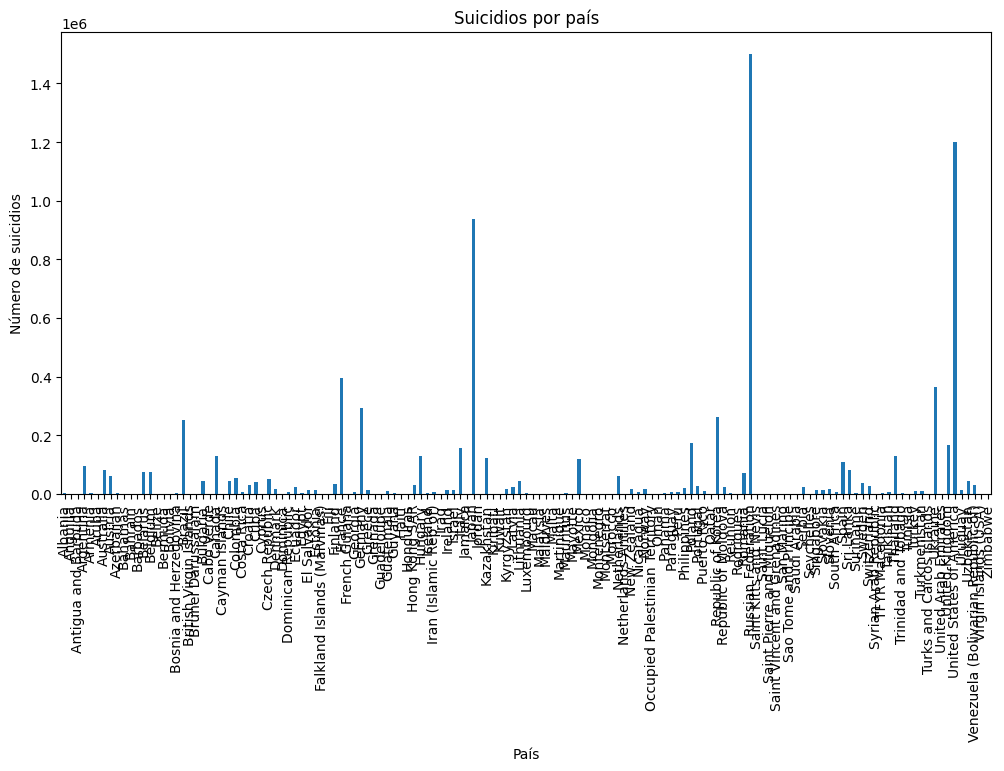

In [2]:
# Lee el archivo CSV
df = pd.read_csv('../fixed_data_who_suicide.csv')

# Estadísticas descriptivas
descripcion = df.describe()
print(descripcion)

# ANOVA
modelo_anova = ols('suicides_no ~ C(country)', data=df).fit()
anova_resultado = sm.stats.anova_lm(modelo_anova, typ=2)
print(anova_resultado)

# Gráficos
# Puedes usar gráficos de barras para visualizar las diferencias entre los países.
plt.figure(figsize=(12, 6))
df.groupby('country')['suicides_no'].sum().plot(kind='bar')
plt.title('Suicidios por país')
plt.xlabel('País')
plt.ylabel('Número de suicidios')
plt.show()